In [1]:
from Simulation import Simulation
from modules.Particle import Particle
from modules.Propagation import Propagation
from modules.Observer import Observer
from modules.Source import Source
import numpy as np

## Simulation of Random Walk Propagation with Spherical Observer

Initialize the simulation by calling Simulation(). The class instance simulation contains all information relevant for the complete simulation.

In [2]:
simulation = Simulation()

### source
gyro_radius = 30.0
diffusion_tensor = np.array([10.0, 10.0, 10.0], dtype=np.float32)
source_position = np.zeros(3, dtype=np.float32)
nr_particles = 100
source = Source(nr_particles, source_position, gyro_radius, diffusion_tensor)
simulation.add_particles(source)

### propagation
step_size = 1.0
propagation = Propagation(step_size)
steps = 10**4
t_max = 10**4
time = np.linspace(1, t_max, steps, dtype=np.float32)
simulation.add_propagation(propagation, time)

### observer sphere
observer = Observer()
sphere_radii = np.array([1.0*10**1, 1.0*10**2, 2.0*10**2, 4.0*10**2, 5.0*10**2], dtype=np.float32)
observer.add_observer_spheres(sphere_radii)
simulation.add_observer(observer)

### run simulation
data = simulation.run_simulation()

init simulation completed
init observer completed


## Analizing Simulation Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data).T
df.columns = ['id', 't', 'x', 'y', 'z', 'radius']
df

,id,t,x,y,z,radius
0,0.0,11.0,-6.350852,6.350852,-6.350852,10.0
1,1.0,11.0,-6.350852,6.350852,6.350852,10.0
2,2.0,11.0,-6.350852,6.350852,-6.350852,10.0
3,3.0,11.0,6.350852,-6.350852,6.350852,10.0
4,4.0,11.0,6.350852,6.350852,6.350852,10.0
...,...,...,...,...,...,...
7064,89.0,9984.0,224.010986,224.010986,244.795471,400.0
7065,29.0,9990.0,-57.735065,57.735065,-57.735065,100.0
7066,98.0,9992.0,121.243225,121.243225,101.613434,200.0
7067,76.0,9993.0,-231.516495,231.516495,-231.516495,400.0


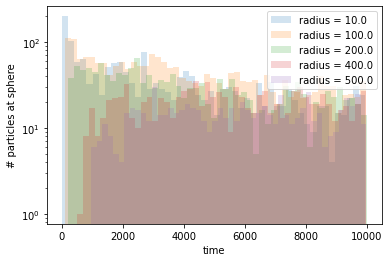

In [4]:
for sphere_radius in sphere_radii:
    plt.hist(df.loc[df['radius'] == sphere_radius]['t'], bins=50, alpha=0.2, label='radius = '+str(sphere_radius))
plt.xlabel('time')
plt.ylabel('# particles at sphere')
plt.legend()
plt.yscale('log')
plt.show()